In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from keras.models import load_model
import keras
import h5py
import requests
import os
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
sns.set()

/opt/anaconda3/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
Using TensorFlow backend.
/opt/anaconda3/envs/venv/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_stock = pd.read_csv("/Users/benjaanabil/Downloads/sandp500/stock500.csv", index_col = 0)
data_stock.head()

,open,high,low,close,volume,Name
date,,,,,,
2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
len(data_stock[data_stock['Name']=='WAT'])

1259

In [4]:
data_stock['Name'].unique()#all names categories have same lenght

array(['AAL', 'AAPL', 'AAP', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       'ADM', 'ADP', 'ADSK', 'ADS', 'AEE', 'AEP', 'AES', 'AET', 'AFL',
       'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK',
       'ALLE', 'ALL', 'ALXN', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMG', 'AMP',
       'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC',
       'APD', 'APH', 'APTV', 'ARE', 'ARNC', 'ATVI', 'AVB', 'AVGO', 'AVY',
       'AWK', 'AXP', 'AYI', 'AZO', 'A', 'BAC', 'BAX', 'BA', 'BBT', 'BBY',
       'BDX', 'BEN', 'BF.B', 'BHF', 'BHGE', 'BIIB', 'BK', 'BLK', 'BLL',
       'BMY', 'BRK.B', 'BSX', 'BWA', 'BXP', 'CAG', 'CAH', 'CAT', 'CA',
       'CBG', 'CBOE', 'CBS', 'CB', 'CCI', 'CCL', 'CDNS', 'CELG', 'CERN',
       'CFG', 'CF', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CINF', 'CI', 'CLX',
       'CL', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP',
       'COF', 'COG', 'COL', 'COO', 'COP', 'COST', 'COTY', 'CPB', 'CRM',
       'CSCO', 'CSRA', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS

Without using pytorch we just did somes test with lstm keras to predict price 'open' for somes name categories

In [5]:
# now prediction of open and low price MMM name stock 
data_s_MM = data_stock[data_stock['Name']=='MMM']
data_s_MM=data_s_MM[['open','high','low']]
data_s_MM

,open,high,low
date,,,
2013-02-08,102.34,103.330,102.0400
2013-02-11,102.39,102.880,102.0401
2013-02-12,102.66,103.590,102.6300
2013-02-13,103.03,103.395,102.5800
2013-02-14,102.43,103.140,102.2200
...,...,...,...
2018-02-01,247.44,250.090,246.1795
2018-02-02,246.43,248.750,244.8800
2018-02-05,243.50,244.400,226.0100


In [6]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_MM = (pd.DataFrame(data_s_MM).values).reshape(3777,1)
data_s_MMM = np.asarray(data_s_MM)
data_s_MMM = red.fit_transform(data_s_MMM)
data_s_MMM

array([[0.0037337 ],
       [0.00999873],
       [0.00183521],
       ...,
       [0.83179344],
       [0.85919504],
       [0.8294583 ]])

In [7]:
#we try to split our data in train and test

X,Y = [],[]
for i in range(len(data_s_MMM)-4):
    X.append(data_s_MMM[i:(i+3),0])
    Y.append(data_s_MMM[(i+3),0])
X=np.array(X)
y=np.array(Y)
X_train,X_test = X[:int(X.shape[0]*0.75)],X[int(X.shape[0]*0.75):]
y_train,y_test = y[:int(y.shape[0]*0.75)],y[int(y.shape[0]*0.75):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

2829
944
2829
944


In [8]:
#add model
Lstm = Sequential()
Lstm.add(LSTM(256,input_shape=(3,1)))
Lstm.add(Dense(1))
Lstm.compile(optimizer='adam',loss='mse')
#get timestamp 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#we train the model
loss = Lstm.fit(X_train,y_train,epochs=200,validation_data=(X_test,y_test),shuffle=False)

Train on 2829 samples, validate on 944 samples
Epoch 1/200
2829/2829 [==============================] - 2s 656us/step - loss: 0.0010 - val_loss: 0.0171
Epoch 2/200
2829/2829 [==============================] - 1s 271us/step - loss: 0.0032 - val_loss: 0.0115
Epoch 3/200
2829/2829 [==============================] - 1s 271us/step - loss: 0.0034 - val_loss: 0.0102
Epoch 4/200
2829/2829 [==============================] - 1s 367us/step - loss: 0.0022 - val_loss: 0.0084
Epoch 5/200
2829/2829 [==============================] - 1s 358us/step - loss: 0.0015 - val_loss: 0.0056
Epoch 6/200
2829/2829 [==============================] - 1s 296us/step - loss: 8.2137e-04 - val_loss: 0.0030
Epoch 7/200
2829/2829 [==============================] - 1s 260us/step - loss: 3.3625e-04 - val_loss: 0.0019
Epoch 8/200
2829/2829 [==============================] - 1s 224us/step - loss: 1.2566e-04 - val_loss: 0.0020
Epoch 9/200
2829/2829 [==============================] - 1s 337us/step - loss: 8.9547e-05 - val_loss:

2829/2829 [==============================] - 1s 339us/step - loss: 1.6812e-04 - val_loss: 0.0141
Epoch 150/200
2829/2829 [==============================] - 1s 241us/step - loss: 1.6784e-04 - val_loss: 0.0141
Epoch 151/200
2829/2829 [==============================] - 1s 202us/step - loss: 1.6755e-04 - val_loss: 0.0142
Epoch 152/200
2829/2829 [==============================] - 1s 326us/step - loss: 1.6763e-04 - val_loss: 0.0142
Epoch 153/200
2829/2829 [==============================] - 1s 284us/step - loss: 1.6736e-04 - val_loss: 0.0142
Epoch 154/200
2829/2829 [==============================] - 1s 223us/step - loss: 1.6692e-04 - val_loss: 0.0141
Epoch 155/200
2829/2829 [==============================] - 1s 372us/step - loss: 1.6654e-04 - val_loss: 0.0142
Epoch 156/200
2829/2829 [==============================] - 1s 266us/step - loss: 1.6531e-04 - val_loss: 0.0142
Epoch 157/200
2829/2829 [==============================] - 1s 227us/step - loss: 1.6317e-04 - val_loss: 0.0142
Epoch 158/200
2

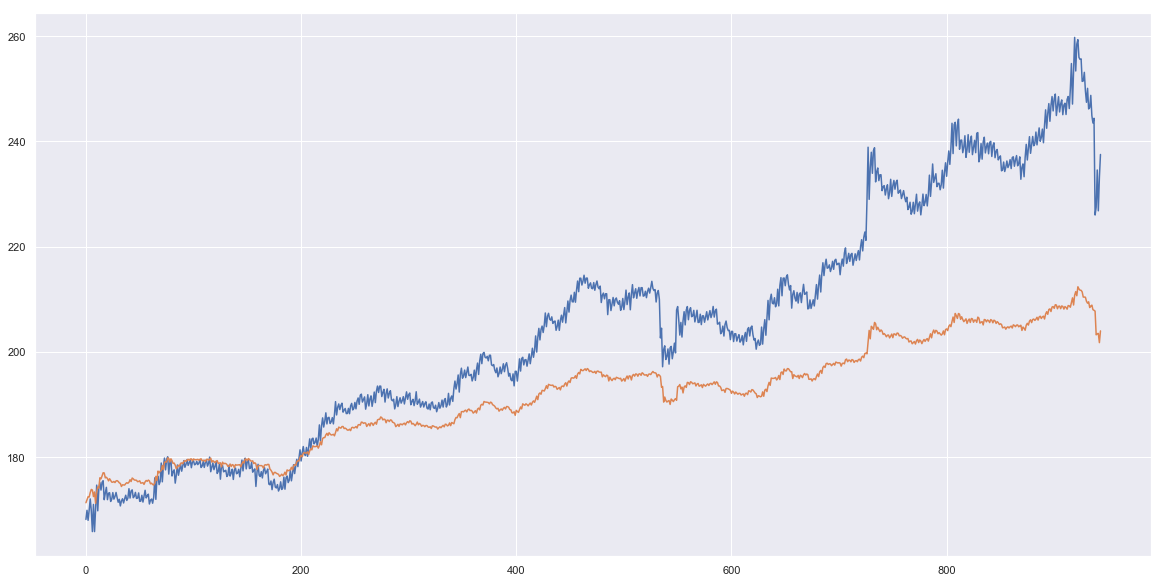

In [9]:
plt.figure(figsize=(20,10))
test_pred = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(test_pred))

In [10]:
#WE print first 50 prediction
reel = []
predicted = []
for i in range(50):

    test_pred = Lstm.predict(X_test[i].reshape(1,3,1))
    print('predicted:',red.inverse_transform(test_pred),'reel:',red.inverse_transform(y_test[i].reshape(-1,1)))
    predicted.append(red.inverse_transform(test_pred))
    reel.append(red.inverse_transform(y_test[i].reshape(-1,1)))
    

predicted: [[171.32272]] reel: [[168.15]]
predicted: [[171.91939]] reel: [[169.89]]
predicted: [[172.46045]] reel: [[167.9795]]
predicted: [[172.40381]] reel: [[169.9]]
predicted: [[173.26422]] reel: [[172.05]]
predicted: [[173.85518]] reel: [[169.78]]
predicted: [[173.74136]] reel: [[165.84]]
predicted: [[172.49564]] reel: [[171.]]
predicted: [[173.36574]] reel: [[165.84]]
predicted: [[171.22278]] reel: [[170.16]]
predicted: [[173.33423]] reel: [[174.67]]
predicted: [[174.33054]] reel: [[169.79]]
predicted: [[174.12114]] reel: [[174.05]]
predicted: [[176.07343]] reel: [[175.13]]
predicted: [[175.867]] reel: [[173.73]]
predicted: [[176.41353]] reel: [[175.23]]
predicted: [[177.02394]] reel: [[175.51]]
predicted: [[176.98523]] reel: [[171.9]]
predicted: [[176.05315]] reel: [[173.16]]
predicted: [[176.16512]] reel: [[174.25]]
predicted: [[175.92407]] reel: [[171.91]]
predicted: [[175.48303]] reel: [[173.13]]
predicted: [[175.88991]] reel: [[173.23]]
predicted: [[175.55798]] reel: [[171.5

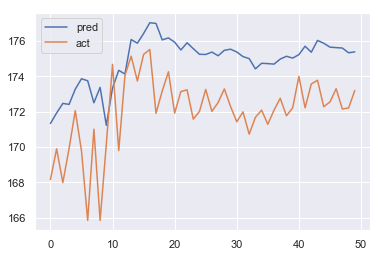

In [11]:
output = pd.DataFrame({'pred':list(np.reshape(predicted, (-1))),'act':list(np.reshape(reel, (-1)))})
output.plot(kind='line')

In [12]:
#prediction of LOW price ALL name stock 
data_s_M = data_stock[data_stock['Name']=='GOOG']
data_s_M=data_s_M.open
data_s_M

date
2014-03-27     568.000
2014-03-28     561.200
2014-03-31     566.890
2014-04-01     558.710
2014-04-02     565.106
                ...   
2018-02-01    1162.610
2018-02-02    1122.000
2018-02-05    1090.600
2018-02-06    1027.180
2018-02-07    1081.540
Name: open, Length: 975, dtype: float64

In [13]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_M = (pd.DataFrame(data_s_M).values).reshape(data_s_M.shape[0],1)
data_s_MT = np.asarray(data_s_M)
data_s_MT = red.fit_transform(data_s_MT)
len(data_s_MT)

975

In [14]:
#we try to split our data in train and test

X,Y = [],[]
for i in range(len(data_s_MT)-4):
    X.append(data_s_MT[i:(i+3),0])
    Y.append(data_s_MT[(i+3),0])
X=np.array(X)
y=np.array(Y)
X_train,X_test = X[:int(X.shape[0]*0.70)],X[int(X.shape[0]*0.70):]
y_train,y_test = y[:int(y.shape[0]*0.70)],y[int(y.shape[0]*0.70):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

679
292
679
292


In [15]:
#add model
Lstm = Sequential()
Lstm.add(LSTM(256,input_shape=(3,1)))
Lstm.add(Dense(1))
Lstm.compile(optimizer='adam',loss='mse')
#get timestamp 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#we train the model
loss = Lstm.fit(X_train,y_train,epochs=150,validation_data=(X_test,y_test),shuffle=False)

Train on 679 samples, validate on 292 samples
Epoch 1/150
679/679 [==============================] - 1s 826us/step - loss: 0.0044 - val_loss: 0.0024
Epoch 2/150
679/679 [==============================] - 0s 218us/step - loss: 0.0138 - val_loss: 0.0084
Epoch 3/150
679/679 [==============================] - 0s 221us/step - loss: 0.0044 - val_loss: 9.8427e-04
Epoch 4/150
679/679 [==============================] - 0s 216us/step - loss: 8.0548e-04 - val_loss: 9.7339e-04
Epoch 5/150
679/679 [==============================] - 0s 215us/step - loss: 5.5798e-04 - val_loss: 5.8524e-04
Epoch 6/150
679/679 [==============================] - 0s 253us/step - loss: 6.1454e-04 - val_loss: 8.9144e-04
Epoch 7/150
679/679 [==============================] - 0s 212us/step - loss: 5.5590e-04 - val_loss: 9.1619e-04
Epoch 8/150
679/679 [==============================] - 0s 210us/step - loss: 4.0883e-04 - val_loss: 5.3600e-04
Epoch 9/150
679/679 [==============================] - 0s 211us/step - loss: 4.1509e-0

Epoch 76/150
679/679 [==============================] - 0s 214us/step - loss: 3.7147e-04 - val_loss: 0.0053
Epoch 77/150
679/679 [==============================] - 0s 210us/step - loss: 4.0817e-04 - val_loss: 0.0048
Epoch 78/150
679/679 [==============================] - 0s 213us/step - loss: 5.2981e-04 - val_loss: 0.0041
Epoch 79/150
679/679 [==============================] - 0s 239us/step - loss: 8.4033e-04 - val_loss: 0.0033
Epoch 80/150
679/679 [==============================] - 0s 215us/step - loss: 0.0015 - val_loss: 0.0029
Epoch 81/150
679/679 [==============================] - 0s 211us/step - loss: 0.0026 - val_loss: 0.0041
Epoch 82/150
679/679 [==============================] - 0s 214us/step - loss: 0.0033 - val_loss: 0.0012
Epoch 83/150
679/679 [==============================] - 0s 259us/step - loss: 0.0033 - val_loss: 5.4465e-04
Epoch 84/150
679/679 [==============================] - 0s 212us/step - loss: 0.0041 - val_loss: 0.0023
Epoch 85/150
679/679 [======================

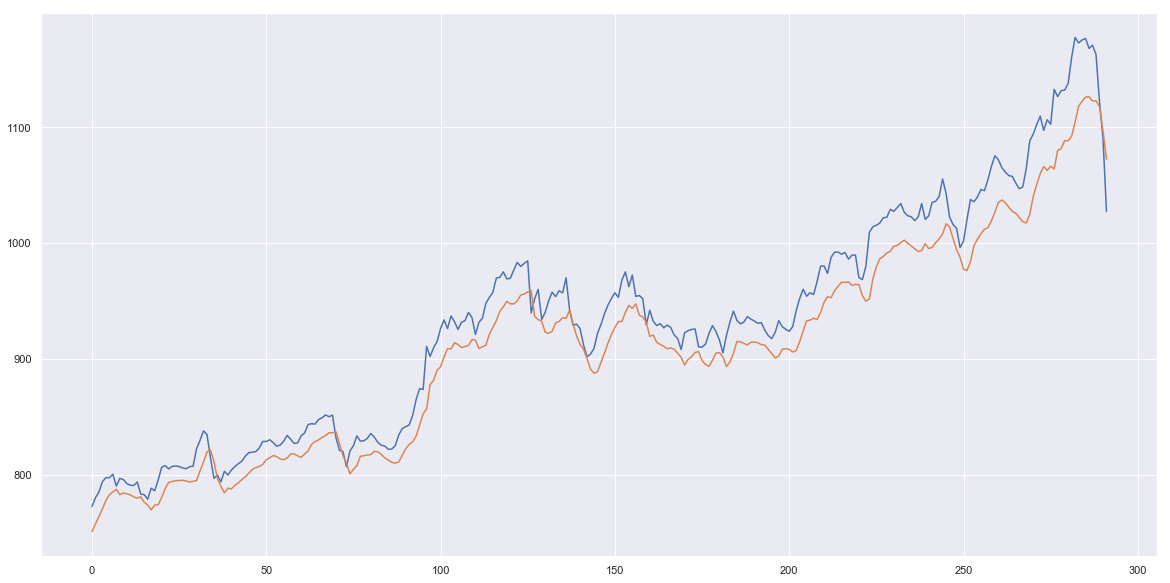

In [16]:
plt.figure(figsize=(20,10))
test_pred = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(test_pred))

In [17]:

reel = []
predicted = []
for i in range(50):

    test_pred = Lstm.predict(X_test[i].reshape(1,3,1))
    print('predicted:',red.inverse_transform(test_pred),'reel:',red.inverse_transform(y_test[i].reshape(-1,1)))
    predicted.append(red.inverse_transform(test_pred))
    reel.append(red.inverse_transform(y_test[i].reshape(-1,1)))
    

predicted: [[750.8965]] reel: [[772.48]]
predicted: [[757.381]] reel: [[780.]]
predicted: [[763.6476]] reel: [[785.04]]
predicted: [[770.32715]] reel: [[793.9]]
predicted: [[777.6936]] reel: [[797.4]]
predicted: [[782.6837]] reel: [[797.34]]
predicted: [[785.1293]] reel: [[800.4]]
predicted: [[787.38165]] reel: [[790.22]]
predicted: [[782.7058]] reel: [[796.76]]
predicted: [[784.2212]] reel: [[795.84]]
predicted: [[783.50244]] reel: [[792.36]]
predicted: [[782.60767]] reel: [[790.9]]
predicted: [[780.7963]] reel: [[790.68]]
predicted: [[779.6822]] reel: [[793.7]]
predicted: [[780.9737]] reel: [[783.33]]
predicted: [[776.1557]] reel: [[782.75]]
predicted: [[773.80005]] reel: [[778.81]]
predicted: [[769.6614]] reel: [[788.36]]
predicted: [[773.6726]] reel: [[786.08]]
predicted: [[774.1297]] reel: [[795.26]]
predicted: [[780.19965]] reel: [[806.4]]
predicted: [[788.0119]] reel: [[807.86]]
predicted: [[793.2006]] reel: [[805.]]
predicted: [[794.0599]] reel: [[807.14]]
predicted: [[794.7613

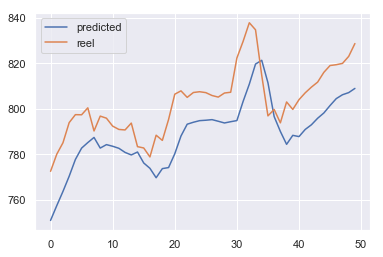

In [18]:
output = pd.DataFrame({'predicted':list(np.reshape(predicted, (-1))),'reel':list(np.reshape(reel, (-1)))})
output.plot(kind='line')

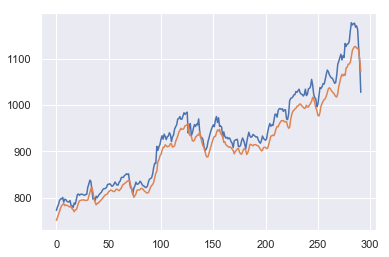

In [19]:
predicted_t = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(predicted_t))

In [20]:
#prediction of LOW price ALL name stock 
data_s_MM = data_stock[data_stock['Name']=='AAL']
data_s_MM=data_s_MM.low
data_s_MM

date
2013-02-08    14.63
2013-02-11    14.26
2013-02-12    14.10
2013-02-13    14.25
2013-02-14    13.16
              ...  
2018-02-01    53.59
2018-02-02    52.03
2018-02-05    49.75
2018-02-06    48.79
2018-02-07    50.89
Name: low, Length: 1259, dtype: float64

In [21]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_MM = (pd.DataFrame(data_s_MM).values).reshape(data_s_MM.shape[0],1)
data_s_MMM = np.asarray(data_s_MM)
data_s_MMM = red.fit_transform(data_s_MMM)
data_s_MMM

array([[0.04279379],
       [0.0345898 ],
       [0.03104213],
       ...,
       [0.82150776],
       [0.80022173],
       [0.84678492]])

In [22]:
#we try to split our data in train and test

X,Y = [],[]
for i in range(len(data_s_MMM)-4):
    X.append(data_s_MMM[i:(i+3),0])
    Y.append(data_s_MMM[(i+3),0])
X=np.array(X)
y=np.array(Y)
X_train,X_test = X[:int(X.shape[0]*0.70)],X[int(X.shape[0]*0.70):]
y_train,y_test = y[:int(y.shape[0]*0.70)],y[int(y.shape[0]*0.70):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

878
377
878
377


In [23]:
#add model
Lstm = Sequential()
Lstm.add(LSTM(256,input_shape=(3,1)))
Lstm.add(Dense(1))
Lstm.compile(optimizer='adam',loss='mse')
#get timestamp 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#we train the model
loss = Lstm.fit(X_train,y_train,epochs=150,validation_data=(X_test,y_test),shuffle=False)

Train on 878 samples, validate on 377 samples
Epoch 1/150
878/878 [==============================] - 1s 730us/step - loss: 0.0154 - val_loss: 0.0313
Epoch 2/150
878/878 [==============================] - 0s 276us/step - loss: 0.0265 - val_loss: 0.0019
Epoch 3/150
878/878 [==============================] - 0s 228us/step - loss: 0.0188 - val_loss: 0.0053
Epoch 4/150
878/878 [==============================] - 0s 224us/step - loss: 0.0058 - val_loss: 0.0013
Epoch 5/150
878/878 [==============================] - 0s 234us/step - loss: 0.0015 - val_loss: 7.2475e-04
Epoch 6/150
878/878 [==============================] - 0s 233us/step - loss: 0.0010 - val_loss: 0.0010
Epoch 7/150
878/878 [==============================] - 0s 217us/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/150
878/878 [==============================] - 0s 276us/step - loss: 0.0012 - val_loss: 0.0017
Epoch 9/150
878/878 [==============================] - 0s 218us/step - loss: 0.0014 - val_loss: 0.0023
Epoch 10/150
878/878 [=

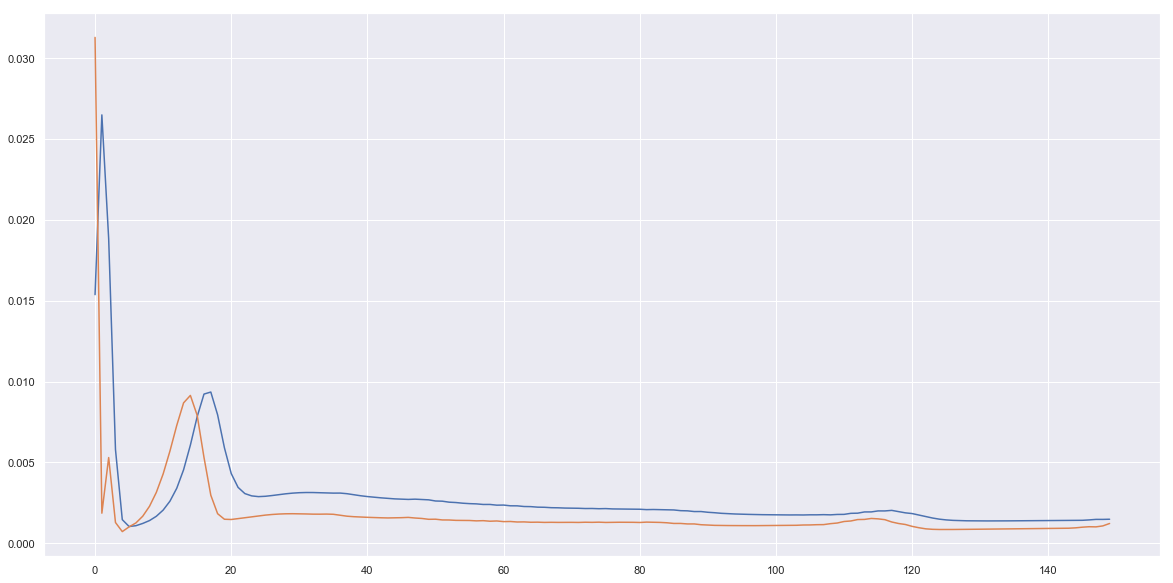

In [24]:
plt.figure(figsize=(20,10))
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])

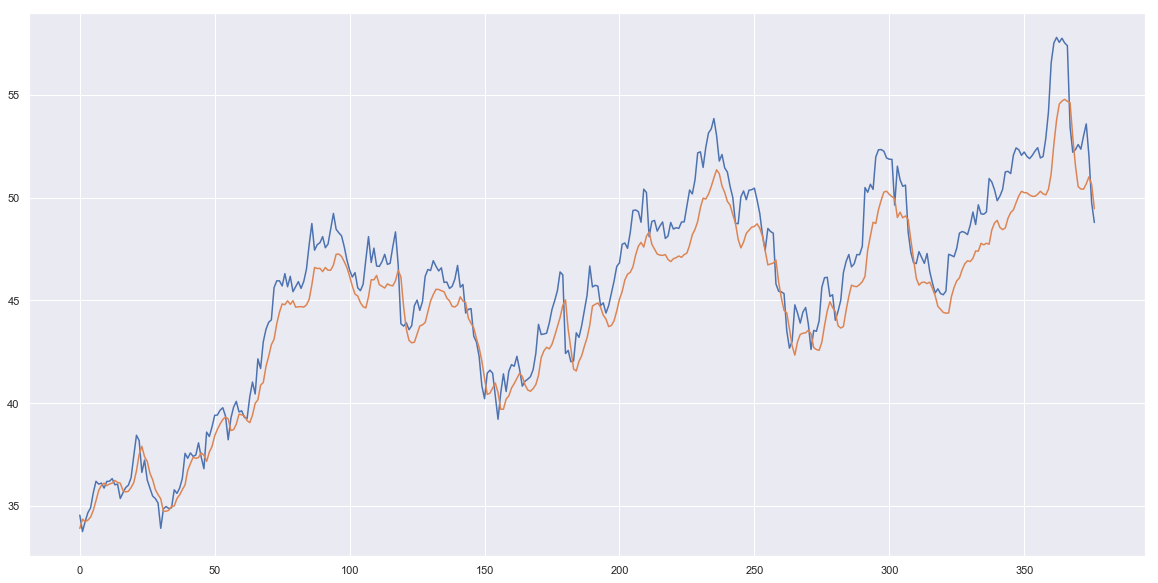

In [25]:
plt.figure(figsize=(20,10))
test_pred = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(test_pred))

In [26]:
reel = []
predicted = []
for i in range(50):

    test_pred = Lstm.predict(X_test[i].reshape(1,3,1))
    print('predicted:',red.inverse_transform(test_pred),'reel:',red.inverse_transform(y_test[i].reshape(-1,1)))
    predicted.append(red.inverse_transform(test_pred))
    reel.append(red.inverse_transform(y_test[i].reshape(-1,1)))
    

predicted: [[33.892555]] reel: [[34.54]]
predicted: [[34.345356]] reel: [[33.74]]
predicted: [[34.22123]] reel: [[34.24]]
predicted: [[34.297825]] reel: [[34.66]]
predicted: [[34.443584]] reel: [[34.9]]
predicted: [[34.773617]] reel: [[35.63]]
predicted: [[35.242805]] reel: [[36.19]]
predicted: [[35.73753]] reel: [[36.05]]
predicted: [[35.99242]] reel: [[36.101]]
predicted: [[36.09606]] reel: [[35.86]]
predicted: [[35.977997]] reel: [[36.18]]
predicted: [[36.05736]] reel: [[36.19]]
predicted: [[36.098602]] reel: [[36.32]]
predicted: [[36.22555]] reel: [[36.02]]
predicted: [[36.136913]] reel: [[36.05]]
predicted: [[36.09424]] reel: [[35.35]]
predicted: [[35.741585]] reel: [[35.63]]
predicted: [[35.670933]] reel: [[35.88]]
predicted: [[35.703438]] reel: [[36.]]
predicted: [[35.884777]] reel: [[36.36]]
predicted: [[36.124825]] reel: [[37.42]]
predicted: [[36.700047]] reel: [[38.43]]
predicted: [[37.497498]] reel: [[38.17]]
predicted: [[37.890045]] reel: [[36.62]]
predicted: [[37.382313]] 

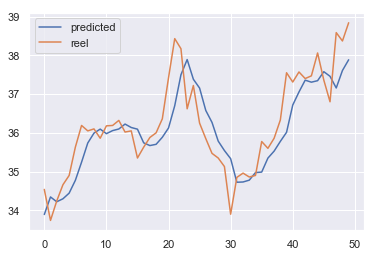

In [27]:
output = pd.DataFrame({'predicted':list(np.reshape(predicted, (-1))),'reel':list(np.reshape(reel, (-1)))})
output.plot(kind='line')

In [28]:
#prediction of open price MMM name stock 
data_s_MM = data_stock[data_stock['Name']=='MMM']
data_s_MM=data_s_MM.open
data_s_MM

date
2013-02-08    102.34
2013-02-11    102.39
2013-02-12    102.66
2013-02-13    103.03
2013-02-14    102.43
               ...  
2018-02-01    247.44
2018-02-02    246.43
2018-02-05    243.50
2018-02-06    227.51
2018-02-07    233.19
Name: open, Length: 1259, dtype: float64

In [29]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_MM = (pd.DataFrame(data_s_MM).values).reshape(data_s_MM.shape[0],1)
data_s_MMM = np.asarray(data_s_MM)
data_s_MMM = red.fit_transform(data_s_MMM)
data_s_MMM

array([[0.00153443],
       [0.0018541 ],
       [0.00358033],
       ...,
       [0.90403427],
       [0.80180295],
       [0.83811777]])

In [30]:
def preproc(data,day):
    X,Y = [],[]
    for i in range(len(data)-day-1):
        X.append(data[i:(i+day),0])
        Y.append(data[(i+day),0])
    return np.array(X),np.array(Y)
X,y = preproc(data_s_MMM,8)
X_train,X_test = X[:int(X.shape[0]*0.70)],X[int(X.shape[0]*0.70):]
y_train,y_test = y[:int(y.shape[0]*0.70)],y[int(y.shape[0]*0.70):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

875
375
875
375


In [31]:
#add model
Lstm = Sequential()
Lstm.add(LSTM(256,input_shape=(8,1)))
Lstm.add(Dense(1))
Lstm.compile(optimizer='adam',loss='mse')
#get timestamp 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#we train the model
loss = Lstm.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)

Train on 875 samples, validate on 375 samples
Epoch 1/100
875/875 [==============================] - 2s 2ms/step - loss: 6.4365e-04 - val_loss: 0.0055
Epoch 2/100
875/875 [==============================] - 1s 977us/step - loss: 0.0057 - val_loss: 0.0020
Epoch 3/100
875/875 [==============================] - 1s 781us/step - loss: 0.0041 - val_loss: 5.0276e-04
Epoch 4/100
875/875 [==============================] - 1s 859us/step - loss: 4.7162e-04 - val_loss: 4.4456e-04
Epoch 5/100
875/875 [==============================] - 1s 791us/step - loss: 5.2516e-04 - val_loss: 9.5907e-04
Epoch 6/100
875/875 [==============================] - 1s 663us/step - loss: 8.8067e-04 - val_loss: 5.2270e-04
Epoch 7/100
875/875 [==============================] - 1s 880us/step - loss: 5.1057e-04 - val_loss: 6.0926e-04
Epoch 8/100
875/875 [==============================] - 1s 847us/step - loss: 7.2031e-04 - val_loss: 6.3873e-04
Epoch 9/100
875/875 [==============================] - 1s 738us/step - loss: 2.6553e

875/875 [==============================] - 0s 512us/step - loss: 1.6686e-04 - val_loss: 3.1681e-04
Epoch 75/100
875/875 [==============================] - 0s 470us/step - loss: 2.1977e-04 - val_loss: 2.1737e-04
Epoch 76/100
875/875 [==============================] - 0s 482us/step - loss: 1.7769e-04 - val_loss: 3.2674e-04
Epoch 77/100
875/875 [==============================] - 0s 498us/step - loss: 2.3700e-04 - val_loss: 2.1321e-04
Epoch 78/100
875/875 [==============================] - 0s 471us/step - loss: 1.8379e-04 - val_loss: 3.2819e-04
Epoch 79/100
875/875 [==============================] - 0s 502us/step - loss: 2.3693e-04 - val_loss: 2.1107e-04
Epoch 80/100
875/875 [==============================] - 0s 493us/step - loss: 1.8168e-04 - val_loss: 3.1543e-04
Epoch 81/100
875/875 [==============================] - 0s 517us/step - loss: 2.1729e-04 - val_loss: 2.0876e-04
Epoch 82/100
875/875 [==============================] - 0s 469us/step - loss: 1.7263e-04 - val_loss: 2.9296e-04
Epoch

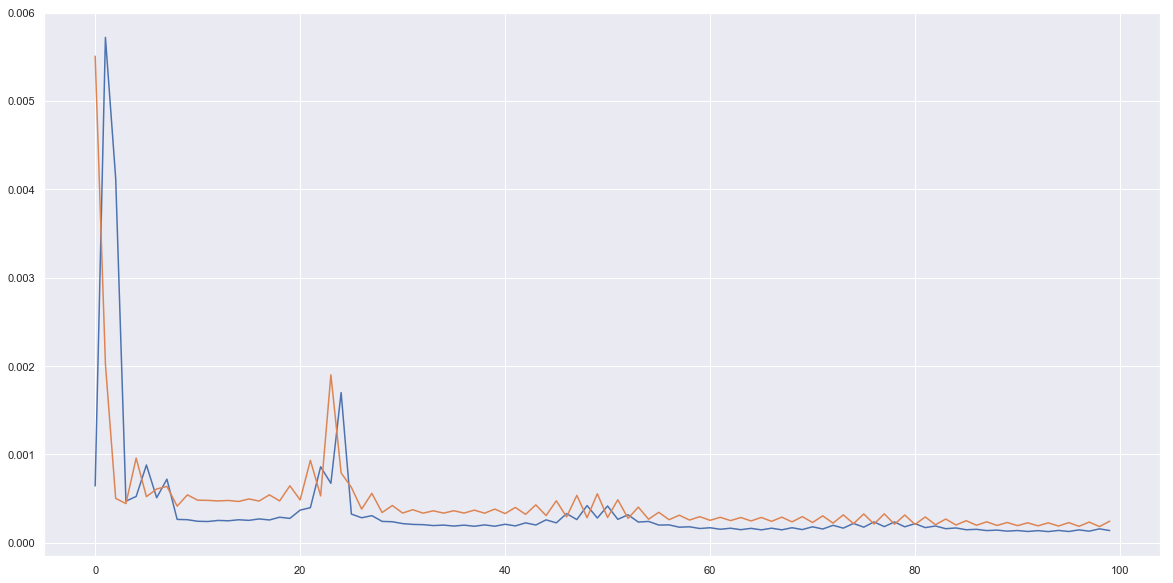

In [32]:
plt.figure(figsize=(20,10))
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])

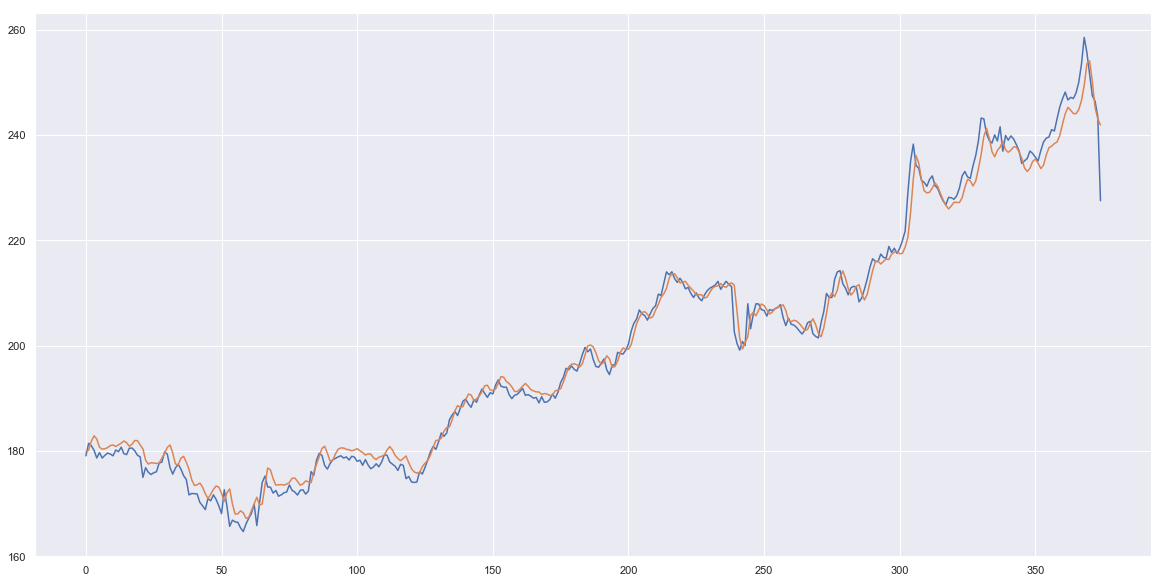

In [33]:
plt.figure(figsize=(20,10))
test_pred = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(test_pred))

In [34]:

reel = []
predicted = []
for i in range(50):

    test_pred = Lstm.predict(X_test[i].reshape(1,8,1))
    print('predicted:',red.inverse_transform(test_pred),'reel:',red.inverse_transform(y_test[i].reshape(-1,1)))
    predicted.append(red.inverse_transform(test_pred))
    reel.append(red.inverse_transform(y_test[i].reshape(-1,1)))
    

predicted: [[179.80685]] reel: [[179.08]]
predicted: [[180.16557]] reel: [[181.47]]
predicted: [[181.865]] reel: [[181.]]
predicted: [[182.88301]] reel: [[180.12]]
predicted: [[182.2727]] reel: [[178.67]]
predicted: [[180.6951]] reel: [[179.7]]
predicted: [[180.35918]] reel: [[178.66]]
predicted: [[180.43523]] reel: [[179.18]]
predicted: [[180.6401]] reel: [[179.61]]
predicted: [[181.03194]] reel: [[179.41]]
predicted: [[181.1423]] reel: [[179.09]]
predicted: [[180.85802]] reel: [[180.19]]
predicted: [[181.16609]] reel: [[179.86]]
predicted: [[181.47707]] reel: [[180.72]]
predicted: [[181.9055]] reel: [[179.49]]
predicted: [[181.57019]] reel: [[179.31]]
predicted: [[180.90594]] reel: [[180.53]]
predicted: [[181.29025]] reel: [[180.56]]
predicted: [[181.99858]] reel: [[180.04]]
predicted: [[181.96507]] reel: [[179.19]]
predicted: [[181.1493]] reel: [[178.89]]
predicted: [[180.4211]] reel: [[175.]]
predicted: [[178.25053]] reel: [[176.83]]
predicted: [[177.51172]] reel: [[175.96]]
predic

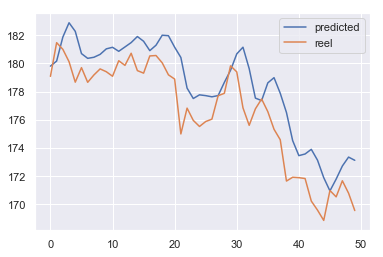

In [35]:
output = pd.DataFrame({'predicted':list(np.reshape(predicted, (-1))),'reel':list(np.reshape(reel, (-1)))})
output.plot(kind='line')

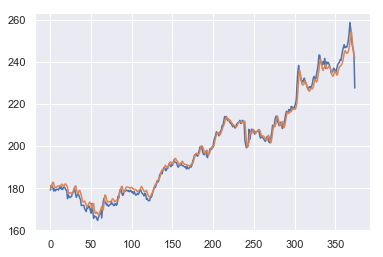

In [36]:
predicted_t = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(predicted_t))

In [37]:
# now prediction of open and low price MMM name stock 
data_s_MM = data_stock[data_stock['Name']=='MMM']
data_s_MM=data_s_MM[['open','low']]
data_s_MM

,open,low
date,,
2013-02-08,102.34,102.0400
2013-02-11,102.39,102.0401
2013-02-12,102.66,102.6300
2013-02-13,103.03,102.5800
2013-02-14,102.43,102.2200
...,...,...
2018-02-01,247.44,246.1795
2018-02-02,246.43,244.8800
2018-02-05,243.50,226.0100


In [38]:
#we Transform features by scaling each feature to a given range. 
#This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
red = MinMaxScaler()
data_s_MM = (pd.DataFrame(data_s_MM).values).reshape(1259*2,1)
data_s_MMM = np.asarray(data_s_MM)
data_s_MMM = red.fit_transform(data_s_MMM)
data_s_MMM

array([[0.00376372],
       [0.00184996],
       [0.00408267],
       ...,
       [0.79778005],
       [0.8384792 ],
       [0.83612529]])

In [39]:
def preproc(data,day):
    X,Y = [],[]
    for i in range(len(data)-day-1):
        X.append(data[i:(i+day),0])
        Y.append(data[(i+day),0])
    return np.array(X),np.array(Y)
X,y = preproc(data_s_MMM,8)
X_train,X_test = X[:int(X.shape[0]*0.70)],X[int(X.shape[0]*0.70):]
y_train,y_test = y[:int(y.shape[0]*0.70)],y[int(y.shape[0]*0.70):]
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

1756
753
1756
753


In [40]:
#add model
Lstm = Sequential()
Lstm.add(LSTM(256,input_shape=(8,1)))
Lstm.add(Dense(1))
Lstm.compile(optimizer='adam',loss='mse')
#get timestamp 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
#we train the model
loss = Lstm.fit(X_train,y_train,epochs=100,validation_data=(X_test,y_test),shuffle=False)

Train on 1756 samples, validate on 753 samples
Epoch 1/100
1756/1756 [==============================] - 1s 806us/step - loss: 8.1192e-04 - val_loss: 0.0025
Epoch 2/100
1756/1756 [==============================] - 1s 584us/step - loss: 0.0018 - val_loss: 0.0025
Epoch 3/100
1756/1756 [==============================] - 1s 479us/step - loss: 0.0021 - val_loss: 0.0038
Epoch 4/100
1756/1756 [==============================] - 1s 495us/step - loss: 0.0011 - val_loss: 0.0021
Epoch 5/100
1756/1756 [==============================] - 1s 481us/step - loss: 3.8076e-04 - val_loss: 0.0015
Epoch 6/100
1756/1756 [==============================] - 1s 486us/step - loss: 1.5380e-04 - val_loss: 6.1100e-04
Epoch 7/100
1756/1756 [==============================] - 1s 481us/step - loss: 1.3596e-04 - val_loss: 6.8511e-04
Epoch 8/100
1756/1756 [==============================] - 1s 481us/step - loss: 1.2438e-04 - val_loss: 6.2578e-04
Epoch 9/100
1756/1756 [==============================] - 1s 472us/step - loss: 1.

Epoch 73/100
1756/1756 [==============================] - 1s 559us/step - loss: 6.7547e-05 - val_loss: 2.4643e-04
Epoch 74/100
1756/1756 [==============================] - 1s 714us/step - loss: 6.5274e-05 - val_loss: 2.2865e-04
Epoch 75/100
1756/1756 [==============================] - 1s 528us/step - loss: 6.7362e-05 - val_loss: 2.1863e-04
Epoch 76/100
1756/1756 [==============================] - 1s 472us/step - loss: 7.5436e-05 - val_loss: 2.2784e-04
Epoch 77/100
1756/1756 [==============================] - 1s 486us/step - loss: 8.2002e-05 - val_loss: 2.4462e-04
Epoch 78/100
1756/1756 [==============================] - 1s 464us/step - loss: 7.6216e-05 - val_loss: 2.4855e-04
Epoch 79/100
1756/1756 [==============================] - 1s 761us/step - loss: 6.6623e-05 - val_loss: 2.4967e-04
Epoch 80/100
1756/1756 [==============================] - 1s 562us/step - loss: 6.0633e-05 - val_loss: 2.4704e-04
Epoch 81/100
1756/1756 [==============================] - 1s 526us/step - loss: 6.0705e-

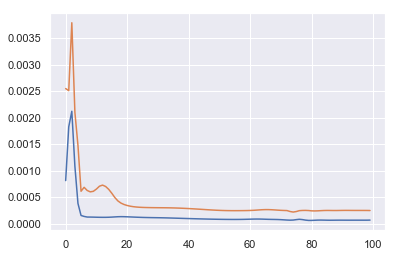

In [41]:
plt.plot(loss.history['loss'])
plt.plot(loss.history['val_loss'])

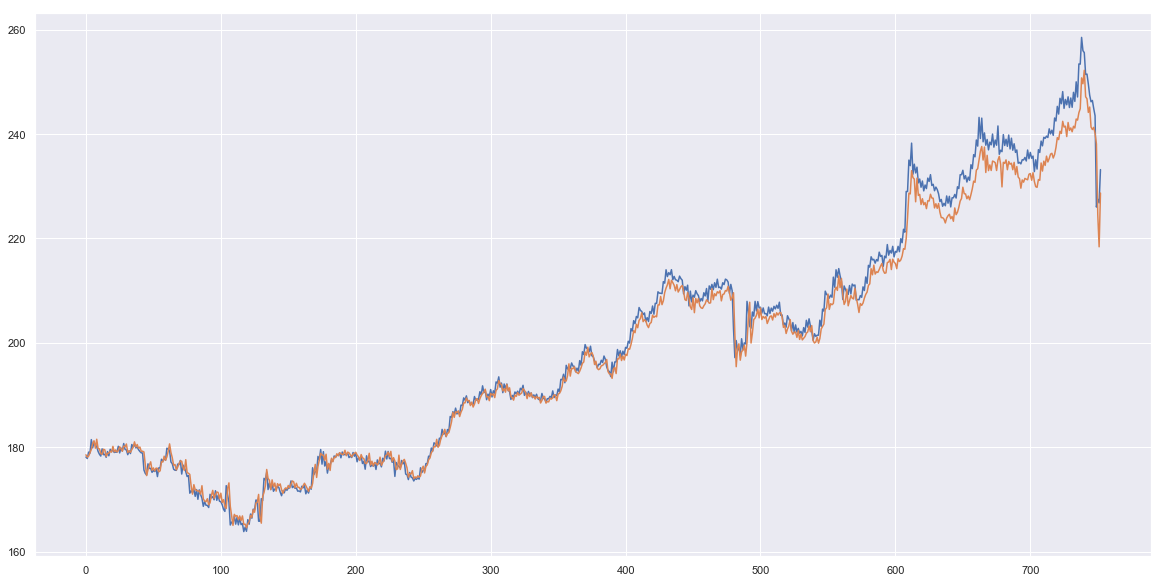

In [42]:
plt.figure(figsize=(20,10))
test_pred = Lstm.predict(X_test)
plt.plot(red.inverse_transform(y_test.reshape(-1,1)))
plt.plot(red.inverse_transform(test_pred))

In [43]:
reel = []
predicted = []
for i in range(50):

    test_pred = Lstm.predict(X_test[i].reshape(1,8,1))
    print('predicted:',red.inverse_transform(test_pred),'reel:',red.inverse_transform(y_test[i].reshape(-1,1)))
    predicted.append(red.inverse_transform(test_pred))
    reel.append(red.inverse_transform(y_test[i].reshape(-1,1)))

predicted: [[178.55734]] reel: [[178.12]]
predicted: [[178.11717]] reel: [[177.85]]
predicted: [[178.31448]] reel: [[179.08]]
predicted: [[178.92621]] reel: [[178.88]]
predicted: [[179.57864]] reel: [[181.47]]
predicted: [[180.74516]] reel: [[179.9]]
predicted: [[181.24869]] reel: [[181.]]
predicted: [[179.82747]] reel: [[180.46]]
predicted: [[181.5392]] reel: [[180.12]]
predicted: [[179.77519]] reel: [[179.21]]
predicted: [[179.69151]] reel: [[178.67]]
predicted: [[178.78415]] reel: [[178.32]]
predicted: [[178.6621]] reel: [[179.7]]
predicted: [[179.62413]] reel: [[178.58]]
predicted: [[179.50995]] reel: [[178.66]]
predicted: [[178.24495]] reel: [[178.08]]
predicted: [[178.82182]] reel: [[179.18]]
predicted: [[178.88902]] reel: [[178.37]]
predicted: [[179.23709]] reel: [[179.61]]
predicted: [[179.06587]] reel: [[179.28]]
predicted: [[180.17267]] reel: [[179.41]]
predicted: [[179.13052]] reel: [[179.01]]
predicted: [[179.49559]] reel: [[179.09]]
predicted: [[179.09843]] reel: [[179.05]

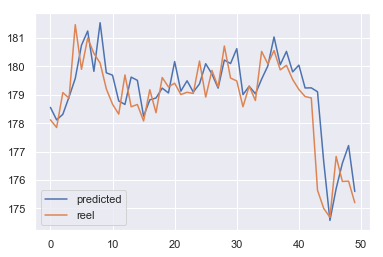

In [44]:
output = pd.DataFrame({'predicted':list(np.reshape(predicted, (-1))),'reel':list(np.reshape(reel, (-1)))})
output.plot(kind='line')